In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
path= '/content/drive/My Drive/Mentoria'

import glob
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='latin-1', sep=","))

# Concatenate all data into one DataFrame
viajes_dia = pd.concat(dfs, ignore_index=True)

viajes_dia.head(15)

Mounted at /content/drive/


,CORREDOR,LINEA,dia2,VIAJES_DIA_CORREDOR,VIAJES_DIA_LINEA,VIAJES_DIA_LINEA_SENT_IDA,VIAJES_DIA_LINEA_SENT_VUELTA
0,Cor 3 Rojo,L35,2019-01-01,1489,132,66,66
1,Cor 1 Naranja,L12,2019-01-01,3034,415,204,211
2,Cor 1 Naranja,L14,2019-01-01,3034,421,196,225
3,Cor 8 Rojo,L84,2019-01-01,935,101,61,40
4,Cor 1 Naranja,L10,2019-01-01,3034,673,328,345
5,Cor 5 Amarillo,L54,2019-01-01,1398,73,49,24
6,Cor 3 Rojo,L33,2019-01-01,1489,85,48,37
7,Cor 1 Naranja,L15,2019-01-01,3034,247,115,132
8,Cor 4 Amarillo,L41,2019-01-01,983,108,61,47
9,Cor 2 Azul,L20,2019-01-01,1728,295,152,143


In [2]:
viajes_dia.shape

(25147, 7)

In [3]:
sum(viajes_dia.VIAJES_DIA_LINEA)

46810109

In [4]:
viajes_dia['VIAJES_LINEA_2019']=viajes_dia.groupby('LINEA')['VIAJES_DIA_CORREDOR'].transform('sum')


In [5]:
viajes_dia.head()

,CORREDOR,LINEA,dia2,VIAJES_DIA_CORREDOR,VIAJES_DIA_LINEA,VIAJES_DIA_LINEA_SENT_IDA,VIAJES_DIA_LINEA_SENT_VUELTA,VIAJES_LINEA_2019
0,Cor 3 Rojo,L35,2019-01-01,1489,132,66,66,5471713
1,Cor 1 Naranja,L12,2019-01-01,3034,415,204,211,8394506
2,Cor 1 Naranja,L14,2019-01-01,3034,421,196,225,8394506
3,Cor 8 Rojo,L84,2019-01-01,935,101,61,40,3765501
4,Cor 1 Naranja,L10,2019-01-01,3034,673,328,345,8394506


In [6]:
# Viajes por corredor 2019(ojo no duplicar)
df1=viajes_dia.drop_duplicates(['CORREDOR', 'dia2'])
df2=df1.loc[:,['VIAJES_DIA_CORREDOR','CORREDOR']]
df2['VIAJES_2019_CORREDOR']=df2.groupby('CORREDOR')['VIAJES_DIA_CORREDOR'].transform('sum')
df2=df2.drop_duplicates('CORREDOR')
df2=df2.loc[:,['CORREDOR','VIAJES_2019_CORREDOR' ]]


In [7]:
#Agregar porcentaje
df2

,CORREDOR,VIAJES_2019_CORREDOR
0,Cor 3 Rojo,5471716
1,Cor 1 Naranja,8394506
3,Cor 8 Rojo,3765539
5,Cor 5 Amarillo,3917416
8,Cor 4 Amarillo,3776063
9,Cor 2 Azul,6455280
11,Cor 7 Azul,4890059
15,Cor 6 Naranja,7208598
27,TROLE,2239457
42,LÃ­n Anu Amarillo,691475


<Figure size 720x432 with 0 Axes>

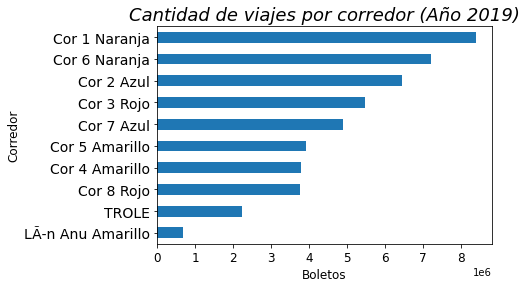

In [8]:
import matplotlib
import matplotlib.pyplot as plt

df2= df2.sort_values(by=['VIAJES_2019_CORREDOR'], ascending=True)
plt.figure(figsize=(10,6))
ax = df2.plot.barh(x='CORREDOR', y='VIAJES_2019_CORREDOR', rot=0)
plt.title('Cantidad de viajes por corredor (Año 2019)', fontsize=18,fontstyle='italic')
plt.xlabel('Boletos', fontsize=12)
plt.ylabel('Corredor', fontsize=12)
ax.get_legend().remove()
#plt.legend("Transporte Urbano de Pasajeros")
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()

In [9]:
# Viajes por linea 2019
dfLinea1=viajes_dia.drop_duplicates(['LINEA', 'dia2'])
dfLinea2=dfLinea1.loc[:,['VIAJES_DIA_LINEA','LINEA']]
dfLinea2['VIAJES_2019_LINEA']=dfLinea2.groupby('LINEA')['VIAJES_DIA_LINEA'].transform('sum')
dfLinea2=dfLinea2.drop_duplicates('LINEA')
dfLinea2=dfLinea2.loc[:,['LINEA','VIAJES_2019_LINEA' ]]


In [10]:
dfLinea2.head()

,LINEA,VIAJES_2019_LINEA
0,L35,757091
1,L12,1309772
2,L14,1209704
3,L84,391140
4,L10,1370335


In [11]:
dfLinea2.shape

(74, 2)

In [12]:
sum(dfLinea2.VIAJES_2019_LINEA)

46810109

In [13]:
# en la práctica se estila guardar/exportar tabla
dfLinea3 = dfLinea2.sort_values(by=['VIAJES_2019_LINEA'], ascending=False)
dfLinea3 = dfLinea3[:10]
dfLinea3


,LINEA,VIAJES_2019_LINEA
20,L60,1723125
11,L70,1584347
4,L10,1370335
1,L12,1309772
29,L50,1268096
23,L40,1245837
2,L14,1209704
16,L32,1208159
14,L30,1187781
13,L11,1179338


<Figure size 720x432 with 0 Axes>

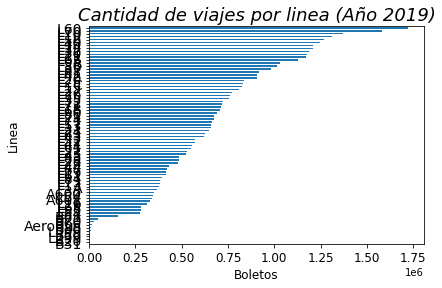

In [14]:
# Cantidad de viajes por Lineas
dfLinea2= dfLinea2.sort_values(by=['VIAJES_2019_LINEA'], ascending=True)
plt.figure(figsize=(10,6))
ax = dfLinea2.plot.barh(x='LINEA', y='VIAJES_2019_LINEA', rot=0)
plt.title('Cantidad de viajes por linea (Año 2019)', fontsize=18,fontstyle='italic')
plt.xlabel('Boletos', fontsize=12)
plt.ylabel('Linea', fontsize=12)
ax.get_legend().remove()
#plt.legend("Transporte Urbano de Pasajeros")
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()


<Figure size 720x432 with 0 Axes>

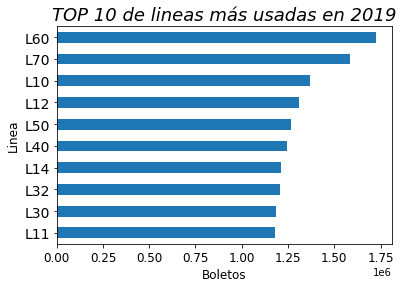

In [15]:
# TOP 10 de viajes por Lineas
dfLinea3= dfLinea3.sort_values(by=['VIAJES_2019_LINEA'], ascending=True)
plt.figure(figsize=(10,6))
ax = dfLinea3.plot.barh(x='LINEA', y='VIAJES_2019_LINEA', rot=0)
plt.title('TOP 10 de lineas más usadas en 2019', fontsize=18,fontstyle='italic')
plt.xlabel('Boletos', fontsize=12)
plt.ylabel('Linea', fontsize=12)
ax.get_legend().remove()
#plt.legend("Transporte Urbano de Pasajeros")
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.show()

In [16]:
df2.sort_values(by=['VIAJES_2019_CORREDOR'], ascending=False, )

,CORREDOR,VIAJES_2019_CORREDOR
1,Cor 1 Naranja,8394506
15,Cor 6 Naranja,7208598
9,Cor 2 Azul,6455280
0,Cor 3 Rojo,5471716
11,Cor 7 Azul,4890059
5,Cor 5 Amarillo,3917416
8,Cor 4 Amarillo,3776063
3,Cor 8 Rojo,3765539
27,TROLE,2239457
42,LÃ­n Anu Amarillo,691475


In [17]:
df1['dia2'] = pd.to_datetime(df1['dia2'], errors='coerce')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Generamos la suma de viajes dia de todo el sistema#
# PENDIENTE!!!!!!!!!!!!!!!!


In [18]:
df_T.head()

NameError: ignored

In [19]:
# Defino variables para los gráficos
ancho = 15
alto = 5

In [20]:
## Viajes por dia todos los corredores#


import seaborn as sns
sns.set_context('talk')

plt.figure(figsize=(ancho, alto))

sns.lineplot(data=df_T.sort_values('dia2'), x='dia2', y='VIAJES_DIA_LINEA', color = 'black')
plt.title('Viajes diarios totales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=90, fontsize=8);

NameError: ignored

<Figure size 1080x360 with 0 Axes>

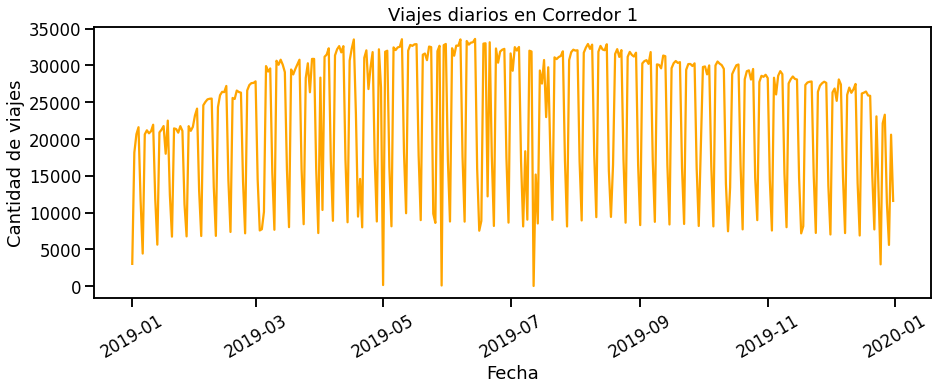

In [21]:
## Viajes por dia y corredor#
## Corredor 1 Naranja##
Cor = 'Cor 1 Naranja'
df3=df1.loc[df1.CORREDOR == Cor]
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df3.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color= 'orange')
plt.title('Viajes diarios en Corredor 1')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

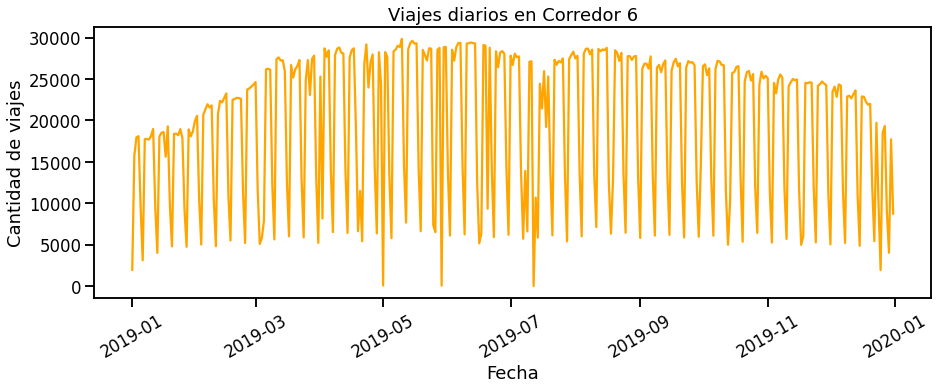

In [22]:
## Viajes por dia y corredor#
## Corredor 6 Naranja##
df4=df1.loc[df1.CORREDOR == 'Cor 6 Naranja']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df4.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color= 'orange')
plt.title('Viajes diarios en Corredor 6')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

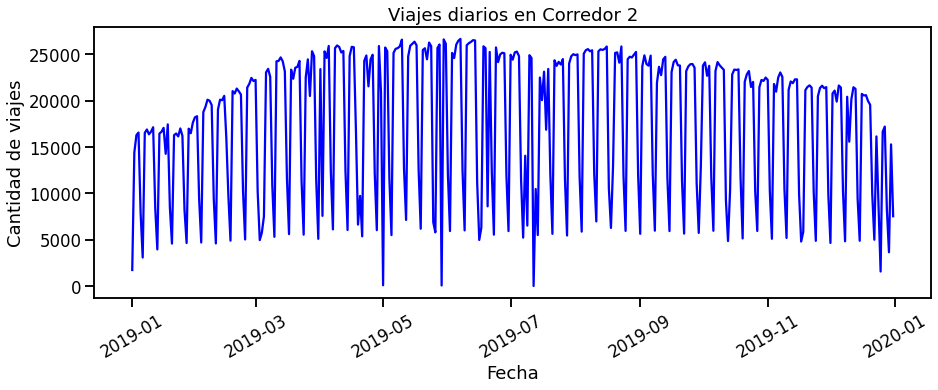

In [23]:
## Viajes por dia y corredor#
## Corredor 2 Azul##
df5=df1.loc[df1.CORREDOR == 'Cor 2 Azul']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df5.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color= 'blue')
plt.title('Viajes diarios en Corredor 2')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

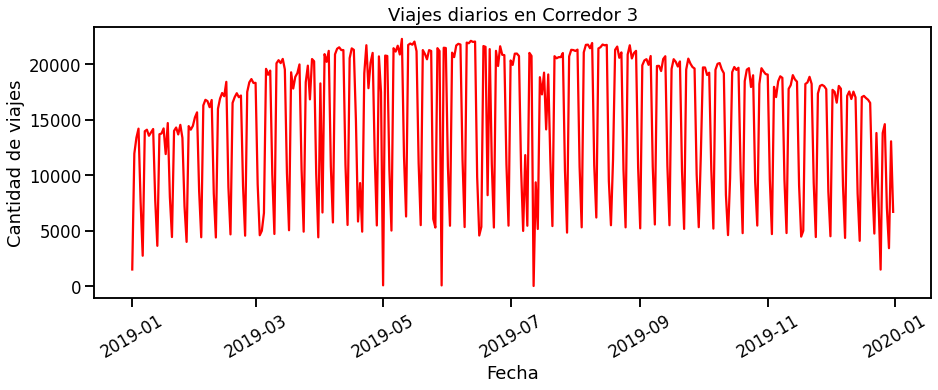

In [24]:
## Viajes por dia y corredor#
## Corredor 3 Rojo##
df6=df1.loc[df1.CORREDOR == 'Cor 3 Rojo']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df6.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color='red')
plt.title('Viajes diarios en Corredor 3')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

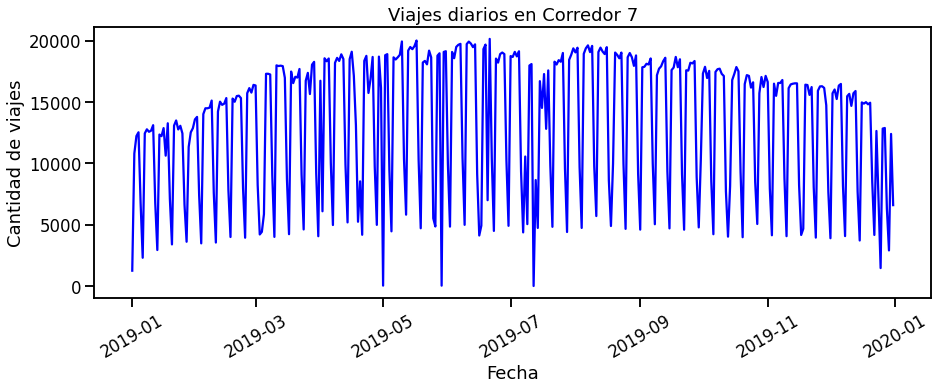

In [25]:
## Viajes por dia y corredor#
## Corredor 7 Azul##
df7=df1.loc[df1.CORREDOR == 'Cor 7 Azul']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df7.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color='blue')
plt.title('Viajes diarios en Corredor 7')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

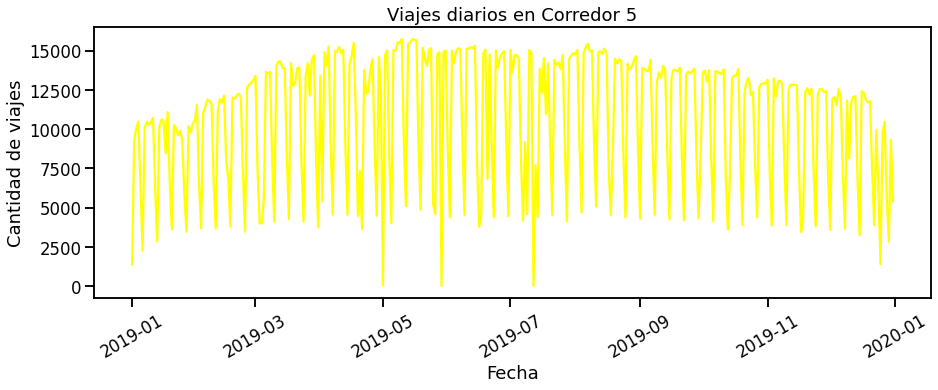

In [26]:
## Viajes por dia y corredor#
## Corredor 5 Amarillo##
df8=df1.loc[df1.CORREDOR == 'Cor 5 Amarillo']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df8.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color='yellow')
plt.title('Viajes diarios en Corredor 5')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);


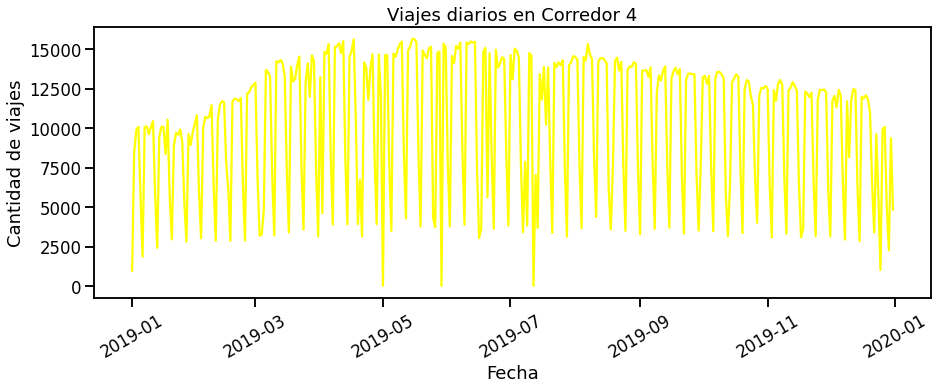

In [27]:
## Viajes por dia y corredor#
## Corredor 4 Amarillo##
df9=df1.loc[df1.CORREDOR == 'Cor 4 Amarillo']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df9.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color='yellow')
plt.title('Viajes diarios en Corredor 4')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

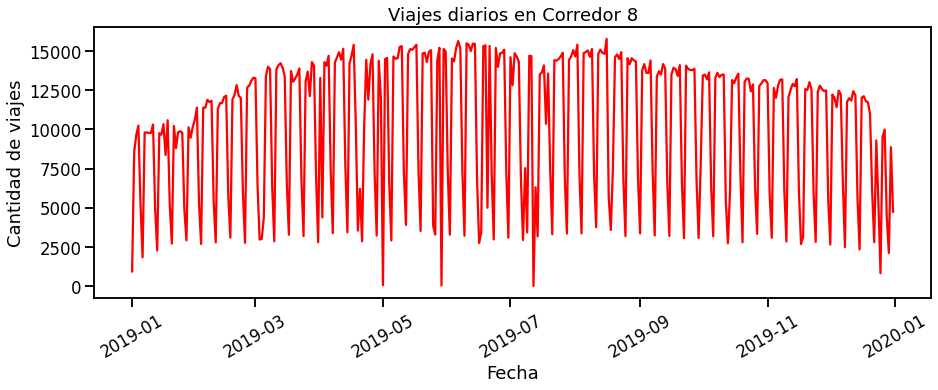

In [28]:
## Viajes por dia y corredor#
## Corredor 8 Rojo##
df10=df1.loc[df1.CORREDOR == 'Cor 8 Rojo']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df10.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color='red')
plt.title('Viajes diarios en Corredor 8')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

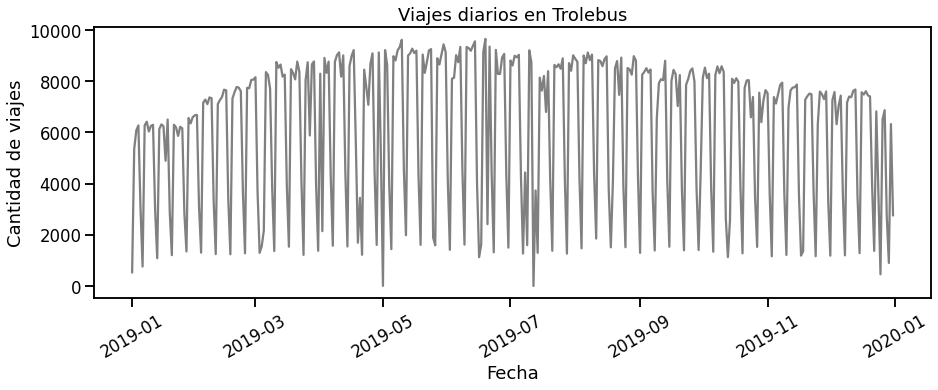

In [29]:
## Viajes por dia y corredor#
## Corredor Trolebus##
df11=df1.loc[df1.CORREDOR == 'TROLE']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df11.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color='grey')
plt.title('Viajes diarios en Trolebus')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

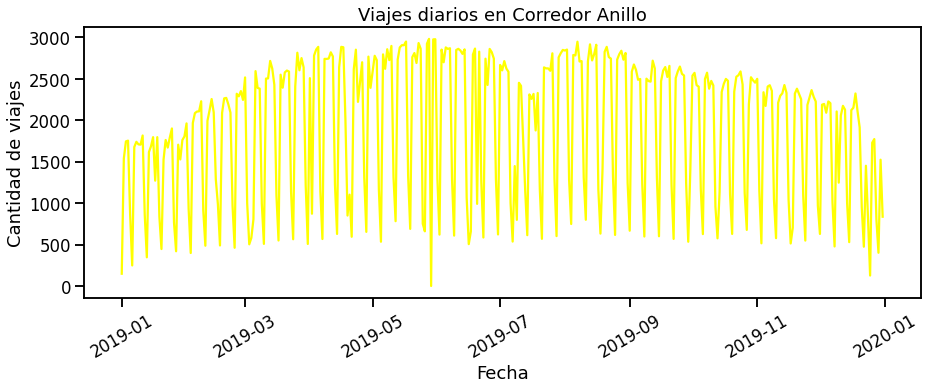

In [30]:
## Viajes por dia y corredor#
## Corredor Anillo Amarillo##
df12=df1.loc[df1.CORREDOR == 'LÃ­n Anu Amarillo']
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
sns.lineplot(data=df12.sort_values('dia2'), x='dia2', y='VIAJES_DIA_CORREDOR', color='yellow')
plt.title('Viajes diarios en Corredor Anillo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

In [ ]:
#AGREGAMOS ANÁLISIS DE VIAJES POR CORREDOR Y MES##

In [31]:
# GENERAMOS LA VARIABLE MES#
viajes_dia['dia2']= pd.to_datetime(viajes_dia['dia2'])
viajes_dia['MES']= viajes_dia['dia2'].dt.to_period('M')

In [32]:

viajes_dia['VIAJES_MES_CORREDOR']=viajes_dia.groupby(['CORREDOR', 'MES'])['VIAJES_DIA_LINEA'].transform('sum')
viajes_dia['VIAJES_MES_LINEA']=viajes_dia.groupby(['LINEA', 'MES'])['VIAJES_DIA_LINEA'].transform('sum')

In [33]:
viajes_dia=viajes_dia.drop_duplicates(['MES', 'CORREDOR'])
viajes_dia.head()

,CORREDOR,LINEA,dia2,VIAJES_DIA_CORREDOR,VIAJES_DIA_LINEA,VIAJES_DIA_LINEA_SENT_IDA,VIAJES_DIA_LINEA_SENT_VUELTA,VIAJES_LINEA_2019,MES,VIAJES_MES_CORREDOR,VIAJES_MES_LINEA
0,Cor 3 Rojo,L35,2019-01-01,1489,132,66,66,5471713,2019-01,351806,44949
1,Cor 1 Naranja,L12,2019-01-01,3034,415,204,211,8394506,2019-01,538247,78374
3,Cor 8 Rojo,L84,2019-01-01,935,101,61,40,3765501,2019-01,246471,27241
5,Cor 5 Amarillo,L54,2019-01-01,1398,73,49,24,3917416,2019-01,261330,24342
8,Cor 4 Amarillo,L41,2019-01-01,983,108,61,47,3776039,2019-01,246723,35642


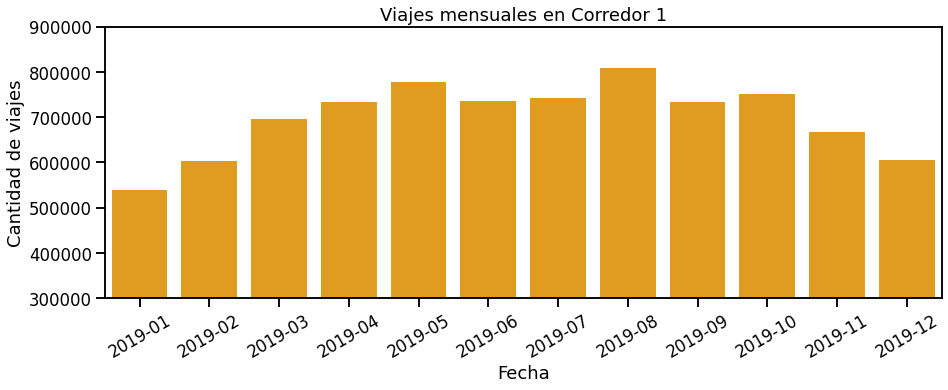

In [34]:
#VIAJES POR MES Y CORREDOR#

## Corredor 1 Naranja##
df13=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 1 Naranja'] 
max= 900000
min= 300000
#import seaborn
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df13.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'orange')
plt.title('Viajes mensuales en Corredor 1')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

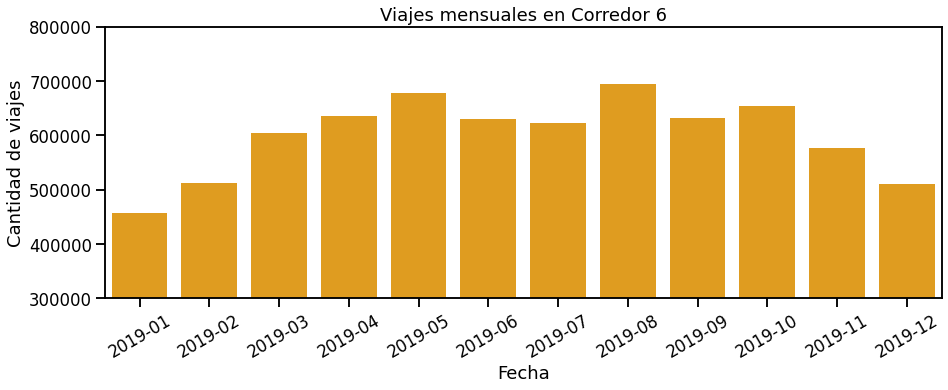

In [35]:
## Viajes por dia y corredor#
## Corredor 6 Naranja##
df14=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 6 Naranja'] 
#import seaborn
max=800000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df14.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'orange')
plt.title('Viajes mensuales en Corredor 6')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

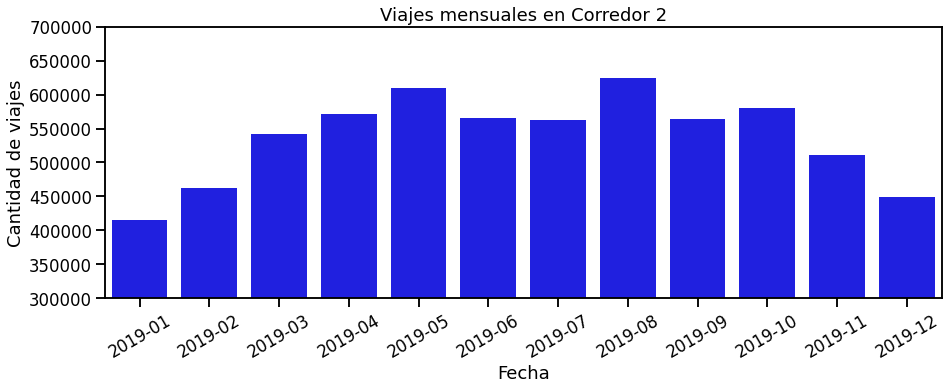

In [36]:
## Viajes por dia y corredor#
## Corredor 2 Azul##
df15=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 2 Azul'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'blue')
plt.title('Viajes mensuales en Corredor 2')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

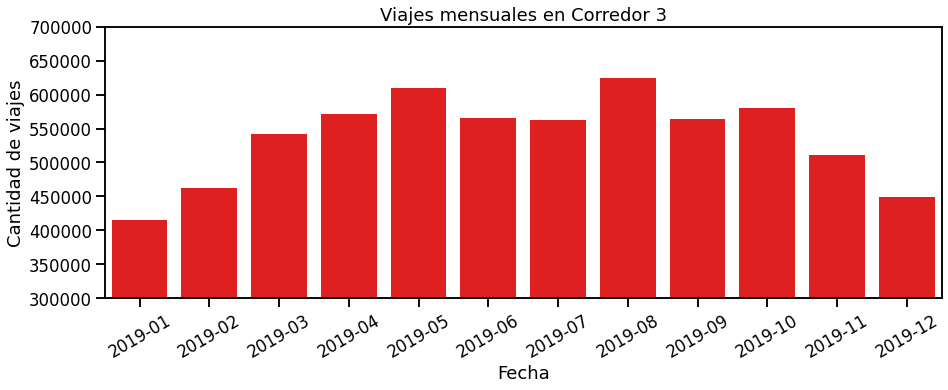

In [37]:
## Viajes por dia y corredor#
## Corredor 3 Rojo##
df16=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 3 Rojo'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'red')
plt.title('Viajes mensuales en Corredor 3')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

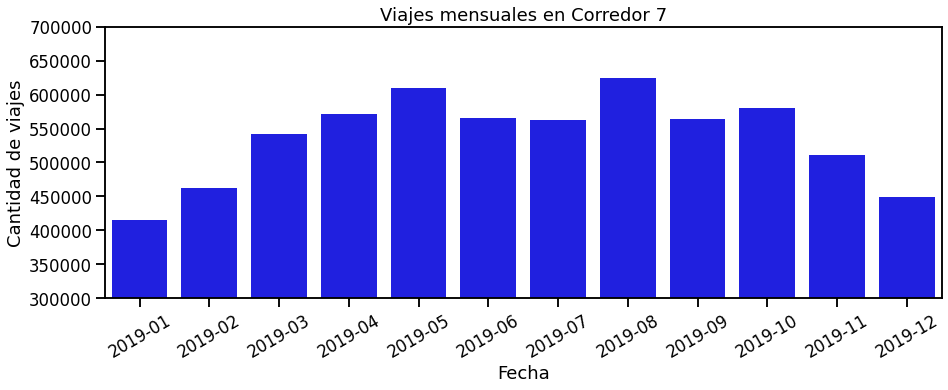

In [38]:
## Viajes por dia y corredor#
## Corredor 7 Azul##
df17=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 7 Azul'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'blue')
plt.title('Viajes mensuales en Corredor 7')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

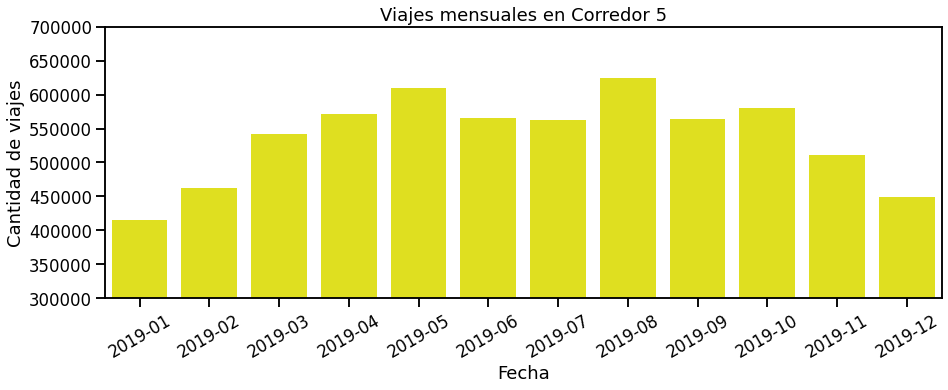

In [39]:
## Viajes por dia y corredor#
## Corredor 5 Amarillo##
df18=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 5 Amarillo'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'yellow')
plt.title('Viajes mensuales en Corredor 5')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

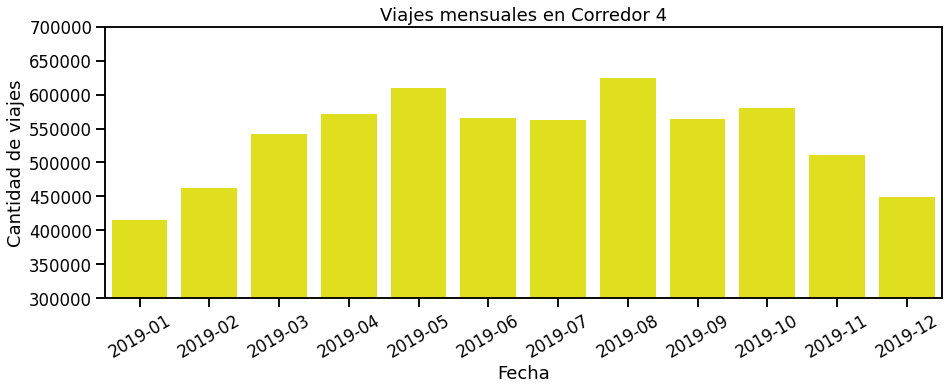

In [40]:
## Viajes por dia y corredor#
## Corredor 4 Amarillo##
df19=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 4 Amarillo'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'yellow')
plt.title('Viajes mensuales en Corredor 4')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

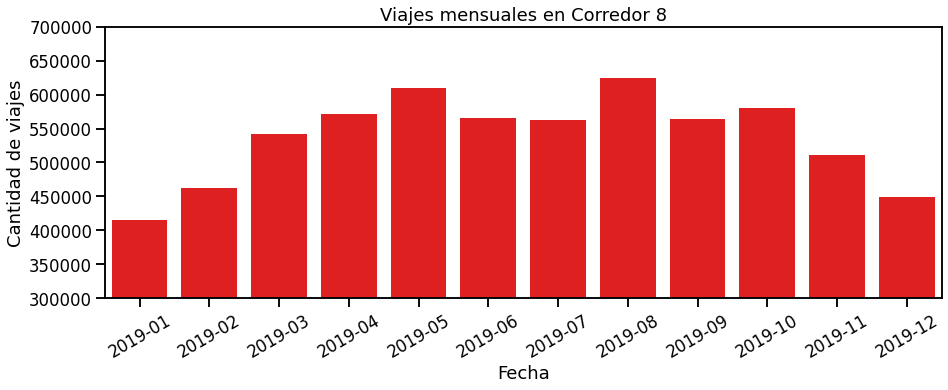

In [41]:
## Viajes por dia y corredor#
## Corredor 8 Rojo##
df20=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor 8 Rojo'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'red')
plt.title('Viajes mensuales en Corredor 8')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

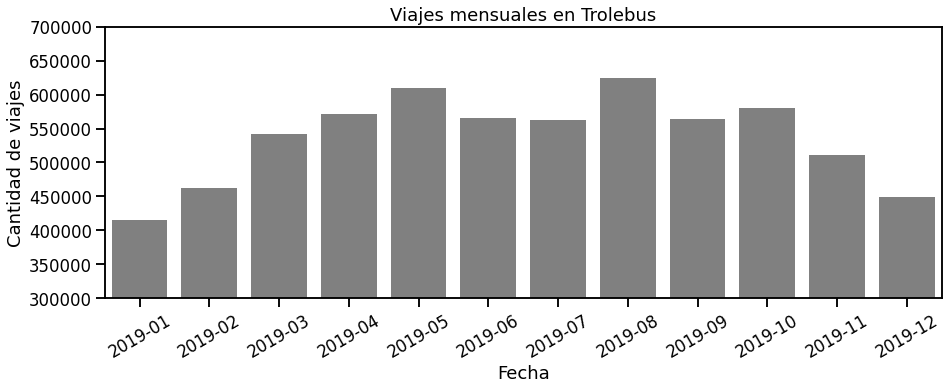

In [42]:
## Viajes por dia y corredor#
## Corredor Trolebus##
df21=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor TROLE'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'grey')
plt.title('Viajes mensuales en Trolebus')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

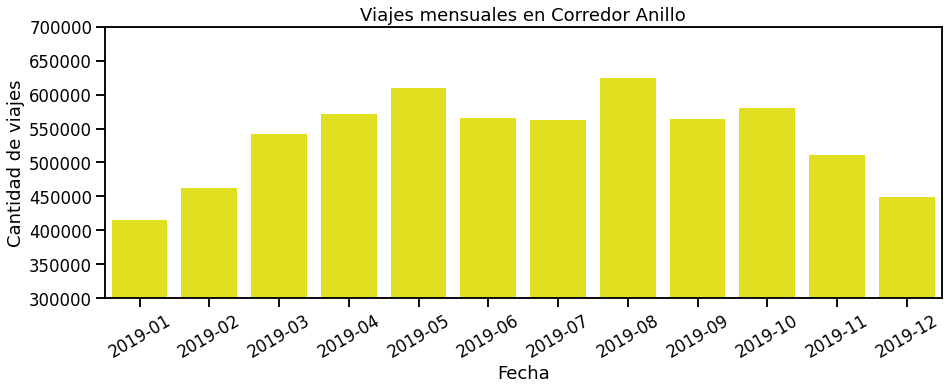

In [43]:
## Viajes por dia y corredor#
## Corredor Trolebus##
df22=viajes_dia.loc[viajes_dia.CORREDOR == 'Cor LÃ­n Anu Amarillo'] 
#import seaborn
max=700000
min=300000
sns.set_context('talk')
plt.figure(figsize=(ancho,alto))
ax=sns.barplot(data=df15.sort_values('MES'), x='MES', y='VIAJES_MES_CORREDOR', color= 'yellow')
plt.title('Viajes mensuales en Corredor Anillo')
ax.set_ylim(min,max)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')

plt.xticks(rotation=30);

##Filtrado de los datos - A


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )
import pandas as pd
#%cd /content/drive/My Drive/bases_mentoria/
path= '/content/drive/My Drive/Mentoria'

import glob
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename, encoding='latin-1', sep=","))

# Concatenate all data into one DataFrame
viajes_dia = pd.concat(dfs, ignore_index=True)

viajes_dia.head(15)

Mounted at /content/drive/


,CORREDOR,LINEA,dia2,VIAJES_DIA_CORREDOR,VIAJES_DIA_LINEA,VIAJES_DIA_LINEA_SENT_IDA,VIAJES_DIA_LINEA_SENT_VUELTA
0,Cor 3 Rojo,L35,2019-01-01,1489,132,66,66
1,Cor 1 Naranja,L12,2019-01-01,3034,415,204,211
2,Cor 1 Naranja,L14,2019-01-01,3034,421,196,225
3,Cor 8 Rojo,L84,2019-01-01,935,101,61,40
4,Cor 1 Naranja,L10,2019-01-01,3034,673,328,345
5,Cor 5 Amarillo,L54,2019-01-01,1398,73,49,24
6,Cor 3 Rojo,L33,2019-01-01,1489,85,48,37
7,Cor 1 Naranja,L15,2019-01-01,3034,247,115,132
8,Cor 4 Amarillo,L41,2019-01-01,983,108,61,47
9,Cor 2 Azul,L20,2019-01-01,1728,295,152,143


In [ ]:
EOF ?